<a href="https://colab.research.google.com/github/mvkumar14/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
import pandas as pd

data_source = "https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

#!curl https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
df = pd.read_csv(data_source)

In [13]:
print(df.shape)
print(df.head())
df.tail()


(1000000, 11)
   Suit  Rank  Suit.1  Rank.1  ...  Rank.3  Suit.4  Rank.4  Class of Hand
0     1     1       1      13  ...       3       1      12              0
1     3    12       3       2  ...       5       2       5              1
2     1     9       4       6  ...       2       3       9              1
3     1     4       3      13  ...       1       3       6              1
4     3    10       2       7  ...      11       4       9              0

[5 rows x 11 columns]


,Suit,Rank,Suit.1,Rank.1,Suit.2,Rank.2,Suit.3,Rank.3,Suit.4,Rank.4,Class of Hand
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1
999999,2,5,2,9,4,9,2,3,3,3,2


So the headers don't show up properly (because header=None was not explicitly mentioned) but something weird is that the second colum is 1.1 instead of 1. I'm guessing this is because the names are auto created, and you can't have two columns with the same name, so it adds the .1 .2 ...

Additionally the shape seems to be correct keeping in mind that this is the training data. The full data set has about 25000 more rows.

In [11]:
#I'm going to see if that naming trick can be used here:
column_names = ['Suit','Rank','Suit','Rank','Suit','Rank','Suit','Rank','Suit','Rank','Class of Hand']
df = pd.read_csv(data_source,header = None,names=column_names)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,Suit,Rank,Suit.1,Rank.1,Suit.2,Rank.2,Suit.3,Rank.3,Suit.4,Rank.4,Class of Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


The naming here is "indexed" at 0. typing it out fully might be a good idea. 

In [0]:
#UCI lists that this data has no missing values, and this is verified below:
df.isnull().sum()

In [15]:
df.describe()

,Suit,Rank,Suit.1,Rank.1,Suit.2,Rank.2,Suit.3,Rank.3,Suit.4,Rank.4,Class of Hand
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


This describe is really only relevant for the last column "class of hand" because it tells us that the "value" of a hand is only 1 in the 75th percentile. Meaning that most hands in poker aren't valuable (which is good for casinos. The likelihood of a customer winning is low). The rest of the colums give us essentially the same spread because they represent "draws" from a deck (possibly multiple decks). It makes sense that the average rank is 7. 

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [46]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed
#this first piece is with the GUI
df = pd.read_csv("/content/bank-additional.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [36]:
#Here it is again with the "load file"
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


### Some notes about "Uploaded" 
I wanted whoever who came after to be able to plug in a file, and not have to worry about changing the name of the text elsewhere, so I wanted to retreive the filename somehow to pass to the read_csv function. Here are some notes about it.

In [40]:
#putting it into a df
print(type(uploaded))
print(uploaded)
df = pd.read_csv("bank-additional-full.csv",sep=';',header=None)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,10,11,12,13,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I made the syntax mistake where I thought the variable itself is what would be passed to the read_csv function. The first part just loads the data into memory, and you use the name of the file that was uploaded in the read_csv function

In [45]:
#I found this code here: https://stackoverflow.com/a/47335122
#It helped me understand that multiple uploads will cause the "uploaded" dictionary to update
for fn in uploaded.keys():
  print("The filename is " + fn)

# all I care about, however, is the last value (so even if the user uploads multiple files it always selects the last one)
print(list(uploaded.keys())[-1])


The filename is bank-additional-full.csv
bank-additional-full.csv


### File detection in read_csv
Now I can use this to import the dataframe regardless of number of uploads

In [51]:
#If you upload a different file this should update accordingly
filename = list(uploaded.keys())[-1]
df = pd.read_csv(filename,sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [91]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [118]:
# First lets look at the amount of categories in each categorical variable:

#This loop gives me the number of categories for the categorical values in the dataframe
for i in df:
  if str(df[i].dtypes) == "object":
    print(i + ":",len(df[i].value_counts()))

print()    #for neat spacing
#This loop prints out all the categories for the categorical values in the dataframe:
for i in df:
  if str(df[i].dtypes) == "object":
    print(i + ":")
    print(df[i].value_counts())
    print("\n")

job: 12
marital: 4
education: 8
default: 3
housing: 3
loan: 3
contact: 2
month: 10
day_of_week: 5
poutcome: 3
y: 2

job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


housing:
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


loan:
no   

In [0]:
#From that list I want to focus in on job and education
print("Job:\n",df['job'].value_counts(),'\n\nEducation:\n',df['education'].value_counts(),sep = "")

In [106]:
#Here is the crosstab:
crosstab = pd.crosstab(df.job,df.education)
crosstab

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

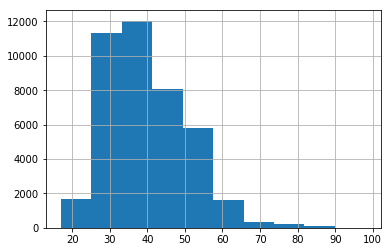

In [90]:
# Histogram:
df.age.hist()

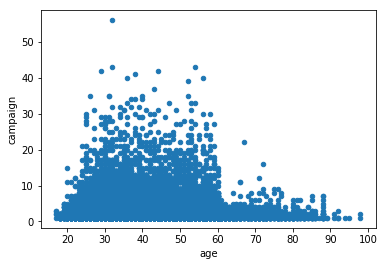

In [95]:
#Scatterplot:
df.plot.scatter('age','campaign');

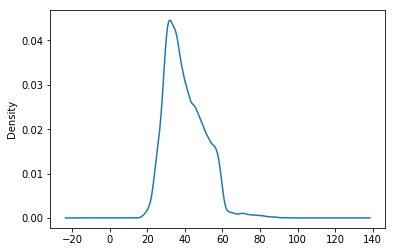

In [104]:
#Density Plot:
df['age'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


### Heatmap1 (Job and Education)

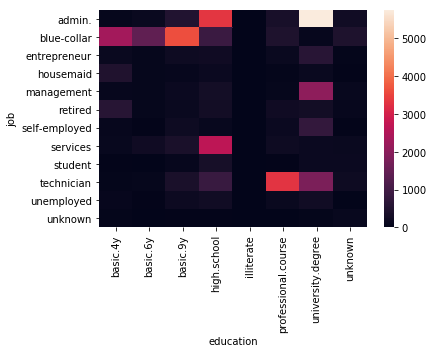

In [107]:
|# I stored the corsstab that was generated before in "crosstab"
import seaborn as sns
sns.heatmap(crosstab)

This heatmap isn't all that useful, partially because categorical variables aren't evenly distributed. This heatmap can be thought of as the distribution of job within an eduction (when read vertically) and education within a job(when read horizontally).


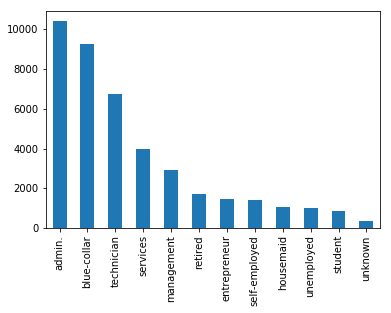

In [111]:
df['job'].value_counts().plot(kind = "bar")

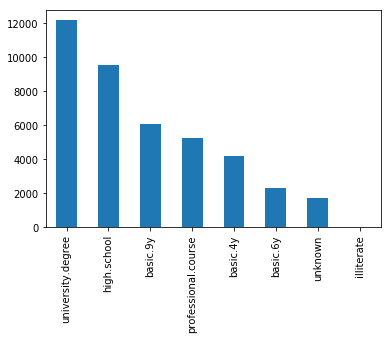

In [112]:
df.education.value_counts().plot(kind='bar')

### Heatmap2

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.